In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
import pandas as pd
import os,sys,glob, h5py, csv

from dlab import generalephys as ephys
from dlab.generalephys import placeAxesOnGrid, cleanAxes
from dlab import utils
from dlab import rf_analysis
from dlab import psth_and_raster as psth
from dlab import reliability_and_precision as rp
from dlab.continuous_traces import gaussian_filter1d
from scipy.signal import find_peaks
from scipy.stats import pearsonr, spearmanr, zscore
from itertools import combinations 
from dlab import psth_and_raster as psth_

import seaborn as sns
sns.set_style('white')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = '/Users/kimberlygagnon/Documents/code/matlab/Rongchen_kinematics.json'
df = pd.read_json(data_path)
#df = df.dropna(axis=0)

In [21]:
# 1 mouse
df_m1 = df[df.MouseID=='cup_WT010_842']

In [30]:
df.columns.unique()

Index(['MouseID', 'filename', 'date', 'day', 'performance', 'reachInit',
       'reachMax', 'reachEnd', 'stim', 'end_category', 'behaviors', 'handX',
       'handY', 'handZ', 'handSideConf', 'handFrontConf', 'pelletX', 'pelletY',
       'pelletZ', 'pelletSideConf', 'pelletFrontConf', 'velRaw', 'velInt',
       'velAbs', 'intHandEuc', 'DTWHandEuc', 'handArcLength', 'DTWHandNorm',
       'fix_velAbs'],
      dtype='object')

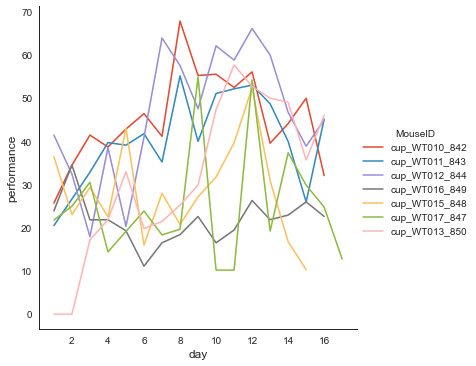

In [13]:
sns.relplot(x=df.day, y=df.performance, kind="line", hue = df.MouseID)

In [21]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

TypeError: unhashable type: 'list'

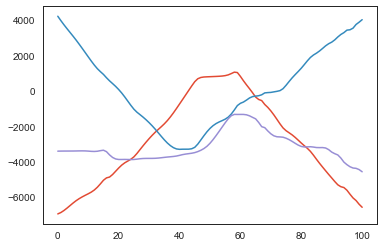

In [25]:
df = df[df.day!=16][df.day!=15]  # remove day 15 and 16

for i in df.MouseID.unique():
    df_temp = df[df.MouseID==i]
    for j in df_temp.day.unique():
        day = j
        df_temp = df_temp[df_temp.day==j]
        #df_temp = df_temp['DTWHandNorm']
        #reaches = df_temp.mean(axis=0)
        for it,ind in enumerate(df_temp.index):
            reach = df_temp.DTWHandNorm[ind]
            behavior = df_temp.behaviors[ind]
            plt.plot(reach,label=behavior)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.title('mouse' + str(i) + ' day' + str(day))
        plt.show()
        plt.close()
    

        

[9935, 6088, 3278, 8004, 1040, 9584, 2581, 9688, 9987, 2193, 1566, 9864, 1785, 9995, 9989, 9997, 10000, 10000, 10000, 10000, 10000, 9972, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9997, 10000, 10000, 10000]


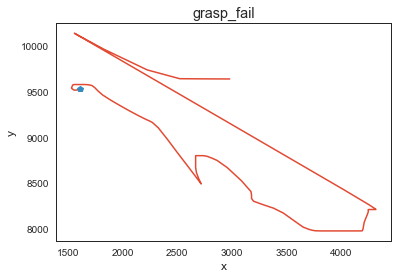

[747, 1011, 413, 156, 49, 325, 65, 92, 31, 46, 49, 68, 7, 11, 22, 19, 120, 16, 70, 2662, 28, 13, 15, 42, 16, 55, 43, 47, 834, 613, 960, 398, 102, 69, 91, 334, 83, 187, 18, 10000, 10000, 10000, 10000, 10000, 10000, 9997, 10000, 10000, 10000, 10000, 10000, 10000, 9984, 8747, 3, 1, 55]


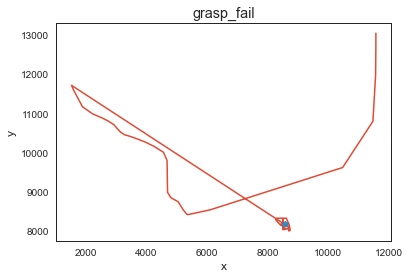

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


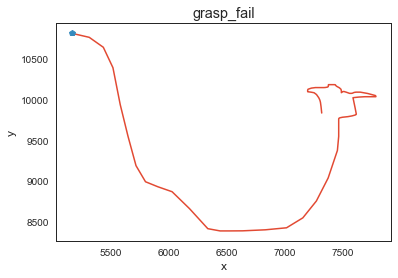

[9093, 9728, 9758, 9433, 9314, 9644, 9893, 9970, 9679, 8466, 8228, 8327, 9286, 9046, 9794, 9410, 9996, 9747, 9999, 10000, 10000, 10000, 9999, 9999, 9966, 9995, 9980, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9998, 9990, 9974, 9844, 9994, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


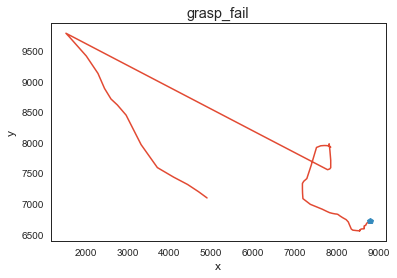

[694, 678, 1140, 4021, 2786, 4227, 6071, 4104, 2646, 7791, 7484, 6676, 7973, 6277, 8729, 8936, 2183, 926, 3408, 957, 7940, 7068, 7297, 6002, 5485, 2900, 814, 710, 275, 151, 112, 5, 5, 11, 11, 9, 9879, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


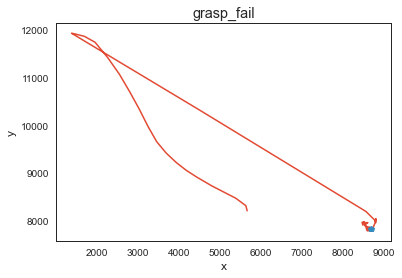

[124, 77, 180, 189, 282, 88, 347, 613, 94, 65, 823, 1393, 570, 598, 99, 226, 82, 199, 9995, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9999, 10000, 10000, 10000]


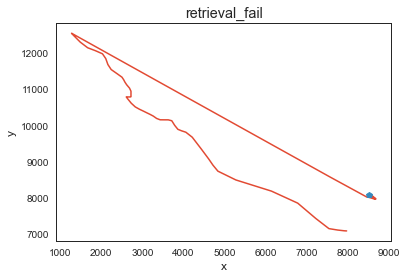

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9941, 9996, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


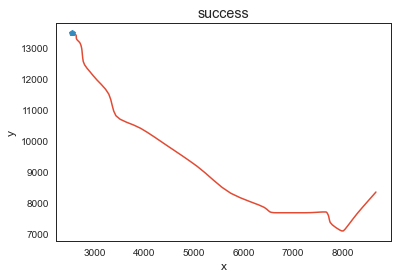

[46, 79, 103, 30, 45, 18, 27, 21, 49, 23, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


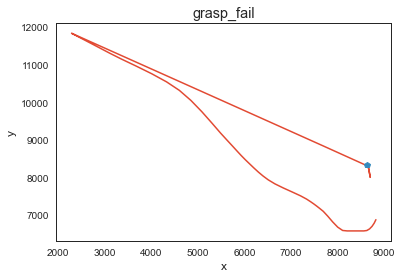

[9983, 9953, 9757, 9098, 9990, 9996, 9956, 9980, 9578, 9994, 9999, 9983, 9992, 10000, 9998, 9966, 9991, 9951, 10000, 9966, 9007, 1300, 247, 22, 4, 10, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9994]


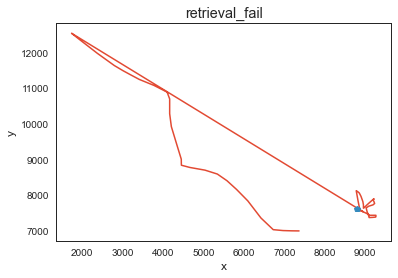

[38, 63, 47, 42, 82, 53, 28, 7, 4, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 2, 3, 2, 1, 2, 1, 0, 10, 80, 79, 453, 268, 1039, 2453, 4172, 7176, 1931, 2887, 2790, 422, 9661, 9979, 9990, 9970, 9838, 9791, 9927, 9613, 3053, 240, 5584, 9997, 10000, 9873, 10000, 10000, 10000, 6742, 7206, 10000, 10000, 9999, 10000, 10000]


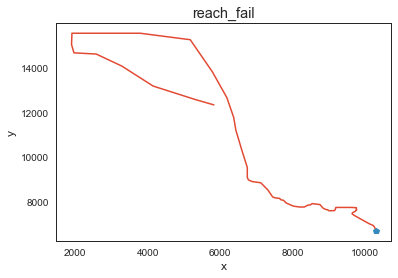

[3535, 2695, 2840, 4043, 4664, 2415, 525, 3248, 7433, 2869, 2427, 3331, 3944, 1083, 2668, 2780, 6803, 3063, 1579, 3388, 3870, 6231, 2271, 4637, 7116, 9191, 7249, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


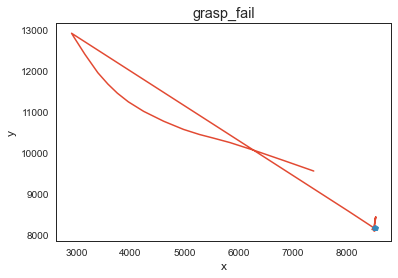

[5119, 44, 440, 118, 37, 661, 3789, 1555, 3459, 5873, 6459, 2550, 39, 176, 16, 1210, 4867, 9810, 9987, 4706, 9277, 2496, 9972, 9966, 9773, 9895, 7748, 5254, 4749, 4722, 7574, 9999, 9998, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9983, 9849, 10000]


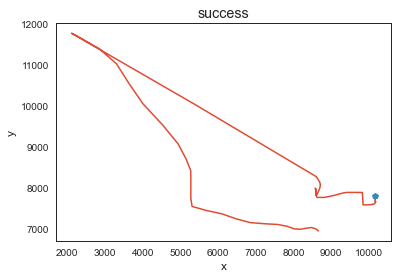

[126, 130, 157, 126, 36, 26, 163, 473, 749, 256, 98, 533, 81, 79, 187, 10000, 10000, 10000, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 6717, 10000, 10000]


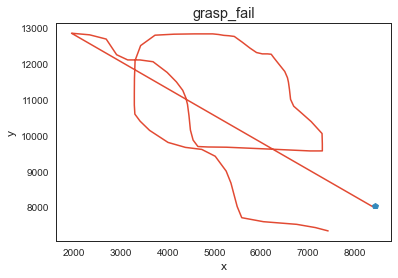

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9977, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9999, 10000, 10000, 10000, 10000]


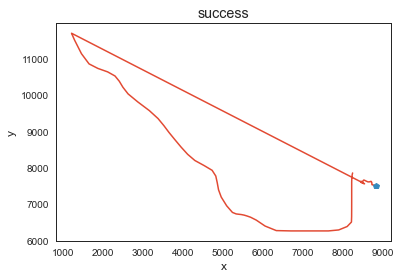

[3857, 2123, 7894, 9290, 8654, 7423, 6157, 2520, 1913, 1858, 1167, 418, 683, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 7004, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 5862, 9914, 6165, 10000, 10000, 10000]


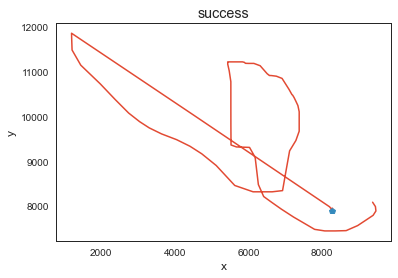

[705, 5860, 9341, 9876, 9706, 9471, 5005, 8837, 9672, 4123, 2380, 5238, 2101, 2213, 9746, 3179, 9192, 9877, 9986, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


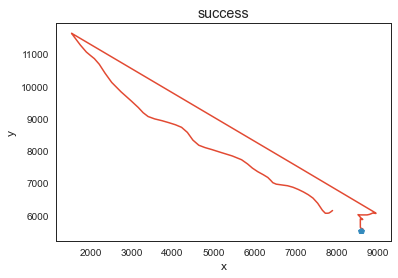

[8741, 14, 9, 15, 73, 59, 35, 16, 10, 26, 20, 44, 42, 149, 136, 482, 181, 41, 36, 48, 1352, 272, 9420, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


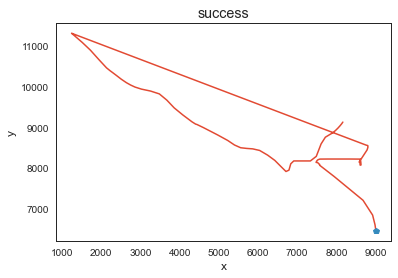

[9998, 10000, 9998, 9999, 10000, 9959, 9770, 9469, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


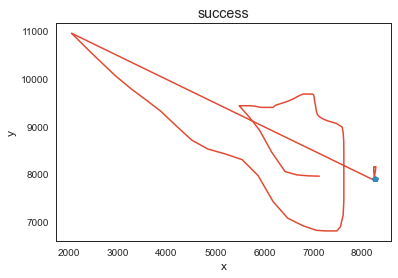

[2151, 1053, 754, 1150, 757, 646, 432, 1929, 869, 2116, 8983, 9998, 9993, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


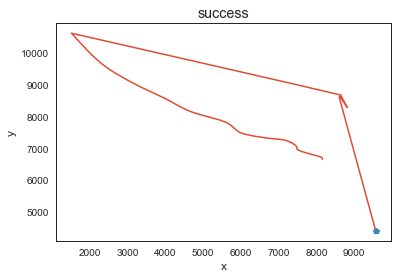

[8462, 9867, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9997, 9999, 9999, 9998, 10000, 10000, 9999, 9994, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


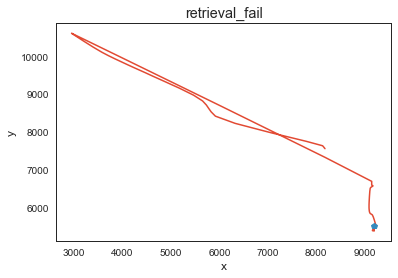

[6821, 1613, 5506, 9798, 9306, 5579, 9659, 9832, 8348, 9117, 176, 1187, 42, 48, 32, 278, 1246, 860, 3633, 1794, 1880, 5327, 3231, 483, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


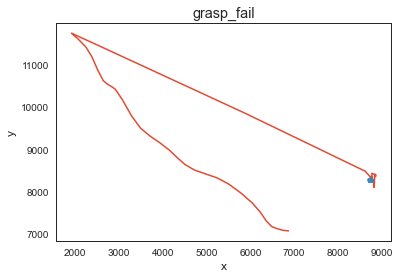

[353, 293, 309, 786, 4117, 2970, 4732, 3321, 6674, 9448, 9605, 9998, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


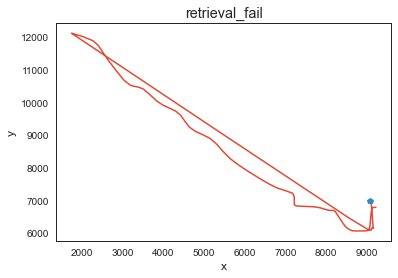

[260, 922, 1201, 1500, 3521, 1092, 1194, 525, 417, 592, 139, 242, 144, 147, 136, 99, 217, 93, 78, 73, 136, 126, 83, 35, 48, 95, 127, 128, 132, 143, 159, 67, 68, 65, 42, 10000, 10000, 10000, 10000, 10000, 10000]


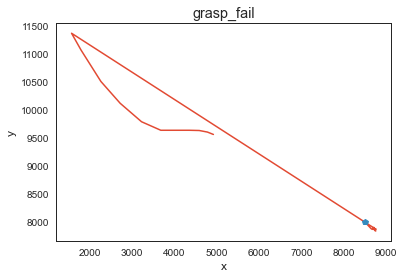

[9771, 9998, 9998, 9998, 9997, 9998, 9999, 9994, 9996, 9962, 9983, 9983, 9993, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9783, 10000]


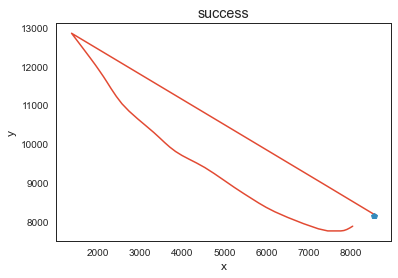

[9987, 9979, 9998, 10000, 9968, 9998, 10000, 10000, 10000, 10000, 10000, 10000, 9996, 10000, 10000, 10000, 10000, 10000, 10000, 9986, 9982, 110, 9667, 10000, 10000, 9976, 10000]


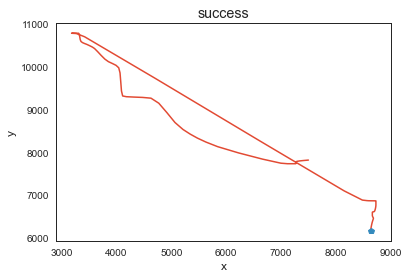

[3, 123, 9816, 9911, 9931, 3886, 2539, 9179, 9450, 6786, 10000, 9849, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


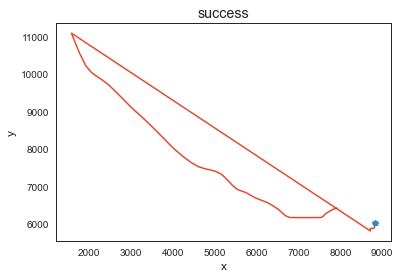

[1042, 508, 456, 6658, 9987, 10000, 10000, 9998, 10000, 10000, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


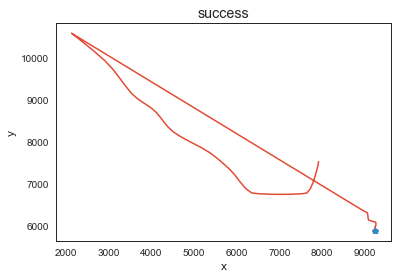

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


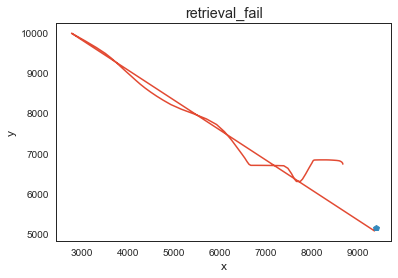

[9195, 6848, 9740, 3975, 6894, 7982, 8416, 6192, 9146, 9872, 9973, 9938, 9993, 9997, 9993, 9990, 9982, 9984, 9998, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


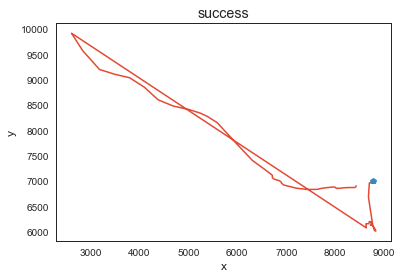

[10000, 9999, 10000, 10000, 9999, 9997, 9986, 9718, 7852, 7438, 696, 34, 26, 465, 553, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


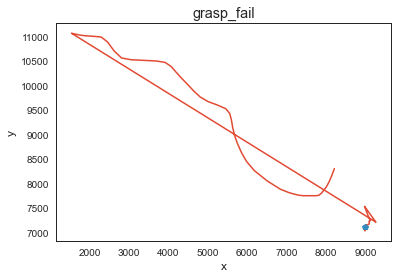

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


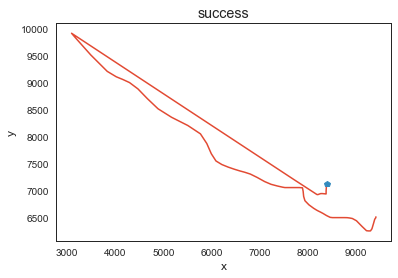

[10000, 10000, 10000, 9999, 9989, 9997, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


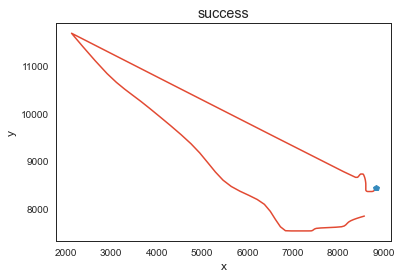

[399, 3179, 1091, 8948, 2087, 3245, 2409, 2507, 1767, 6460, 1783, 72, 161, 1647, 1119, 9575, 9889, 9489, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


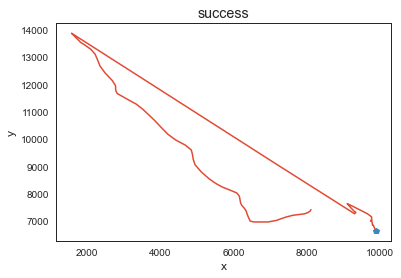

[223, 91, 1112, 449, 4234, 9072, 8547, 8527, 8932, 8960, 4860, 7365, 2714, 3028, 1823, 2204, 9808, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


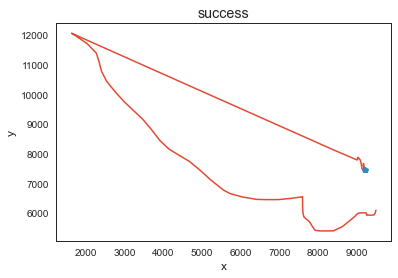

[84, 70, 101, 36, 136, 140, 2366, 2964, 442, 145, 47, 17, 25, 75, 24, 28, 43, 51, 50, 63, 131, 129, 117, 9720, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


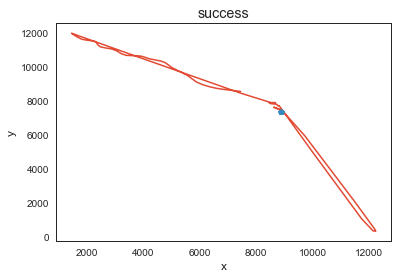

[148, 182, 130, 150, 558, 978, 2471, 392, 1824, 7349, 2095, 2823, 9504, 9979, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


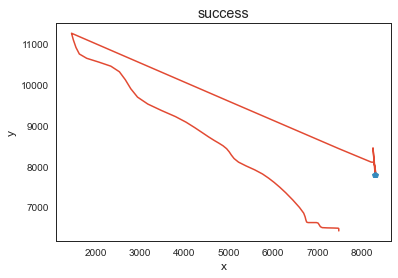

[9998, 9999, 9994, 10000, 9999, 756, 9501, 4376, 9998, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


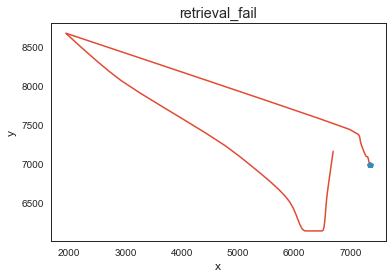

[8909, 6248, 1811, 1570, 7181, 2940, 2679, 5094, 3659, 1070, 1761, 549, 1599, 78, 2543, 9992, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9978, 10000, 10000, 10000]


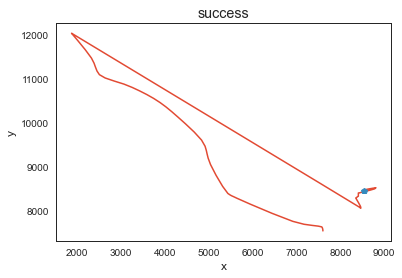

[9996, 10000, 10000, 9983, 2707, 3249, 620, 421, 3209, 835, 42, 23, 310, 1272, 13, 228, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


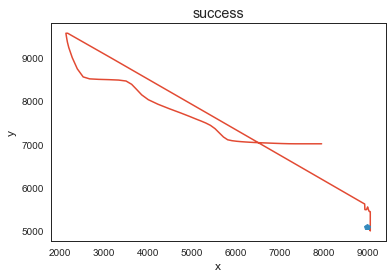

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9580, 9494, 10000]


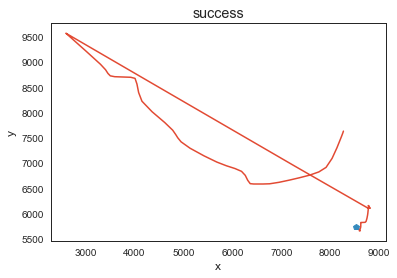

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9999, 10000, 10000, 10000, 10000]


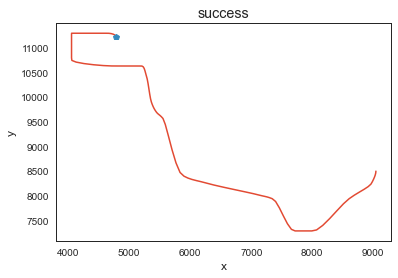

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9999, 10000, 3328, 9193, 9999, 10000, 9999, 9999, 10000, 10000, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9506, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 9999]


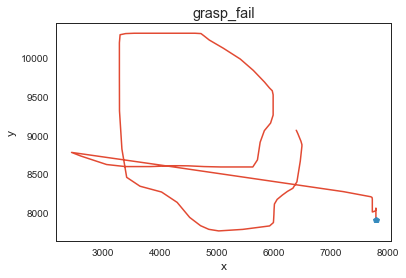

[9744, 9956, 9999, 9997, 9997, 9997, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


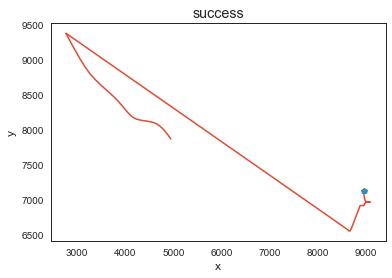

[4191, 9789, 9792, 9986, 9995, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


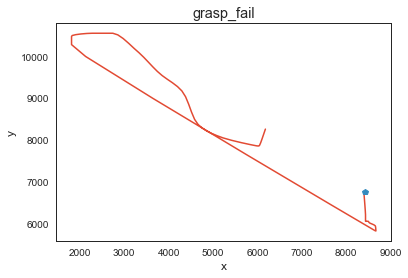

In [274]:
x=df.IntHandX
y=df.IntHandY
for i in range(len(x)):
    plt.figure()
    plt.plot(x[i],y[i])
    plt.plot(x[i][0],y[i][0],'p')
    print(df.sideHandP[i])
    # = abs(np.diff(x[i]))
    #b = abs(np.diff(y[i]))
    #print(a)
    #print(b)
    title = df.behaviors[i]
    plt.title(str(title))
    plt.xlabel('x')
    plt.ylabel('y')
    # Show/save figure as desired.
    plt.show()
    #plt.savefig(save_path+'reach'+str(i)+'.png')
    plt.close()

In [261]:
x=df.IntHandX
y=df.IntHandY
xs = []
ys = []
reach = []
bad = []

for i in range(len(x)):
    diff = np.diff(x[i])
    if all(diff < 2000):
        xs.append(x[i])
        ys.append(y[i])
        reach.append(i)
    else:
        bad.append(i)

In [239]:
x=df.HandX
y=df.HandY
xs = []
ys = []
reachs = []
bad = []

for i in range(len(x)):
    diff = np.diff(x[i])
    if any(diff > 1500):
        bad.append(i)
    else:
        xs.append(x[i])
        ys.append(y[i])
        reachs.append(i)

In [241]:
x=df.HandX
y=df.HandY
behav = df.behaviors

goodx = []
goody = []
behavs = []
for i,reach in enumerate(reachs):
    xs = x[reach]
    ys = y[reach]
    behav_ = behav[i]
    goodx.append(xs)
    goody.append(ys)
    behavs.append(behav_)

In [242]:
df_good = pd.DataFrame(data=reachs,columns = ['reach_num'])

In [243]:
df_good = pd.DataFrame(index=reachs)

In [244]:
df_good['x'] = goodx

In [245]:
df_good['y'] = goody

In [246]:
df_good['behaviors'] = behavs

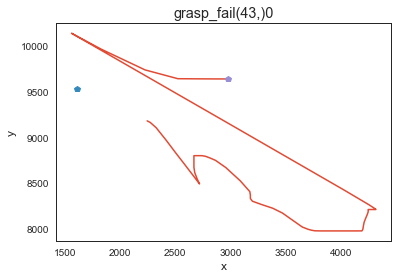

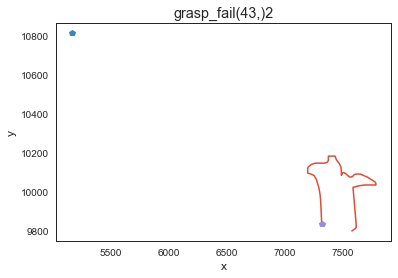

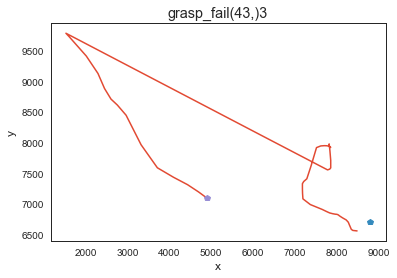

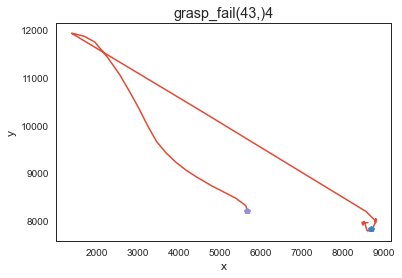

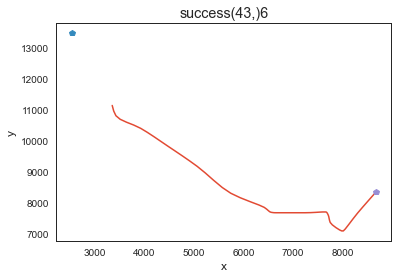

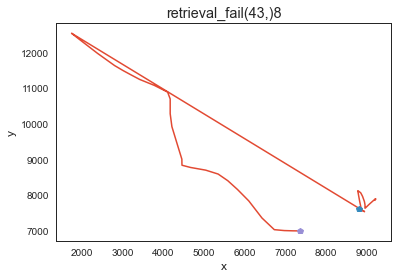

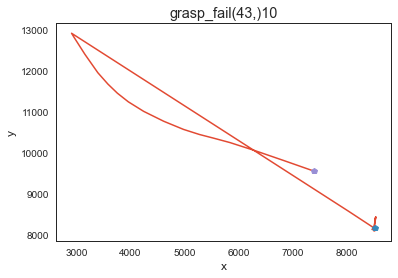

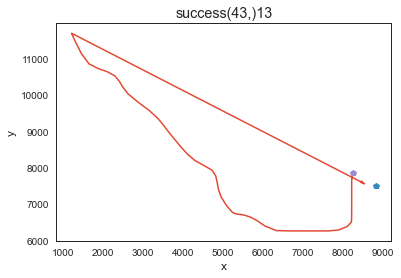

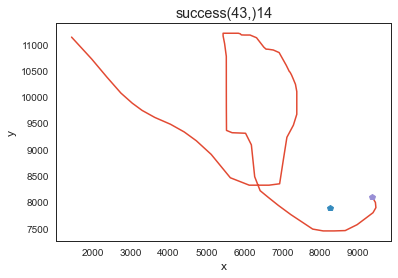

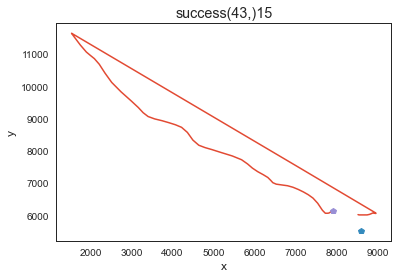

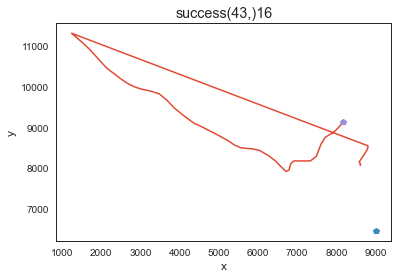

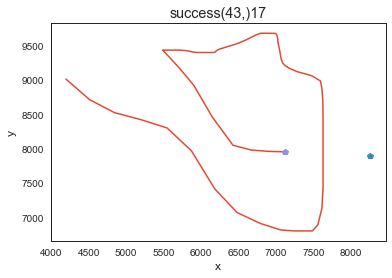

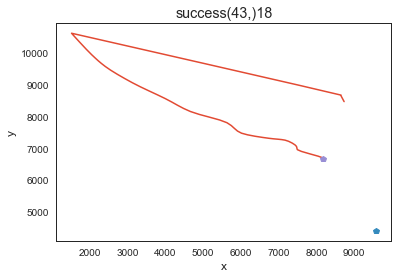

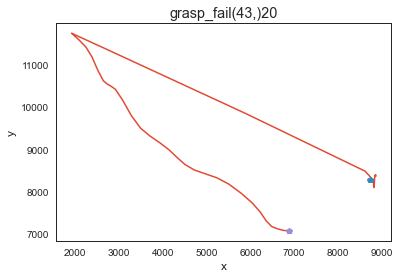

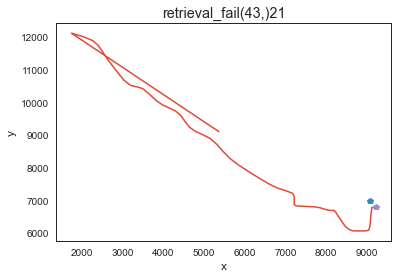

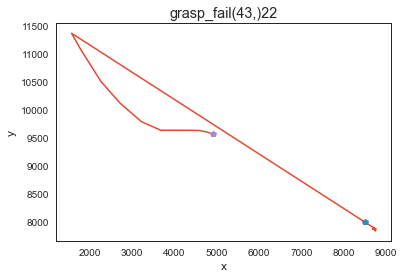

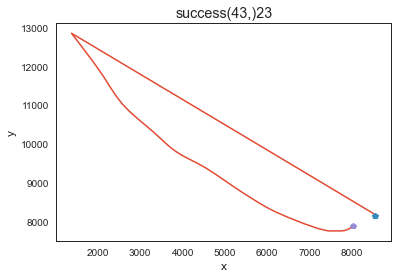

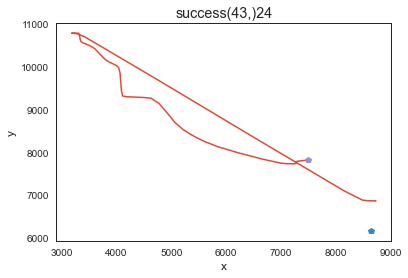

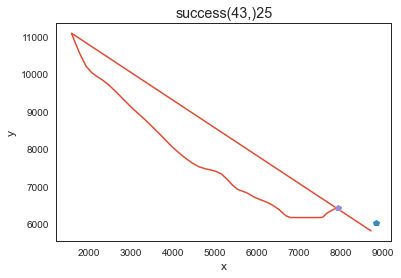

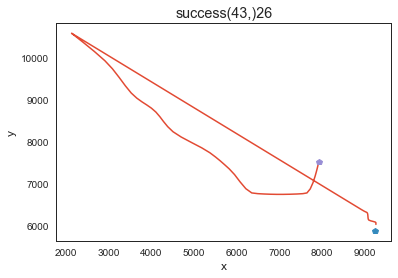

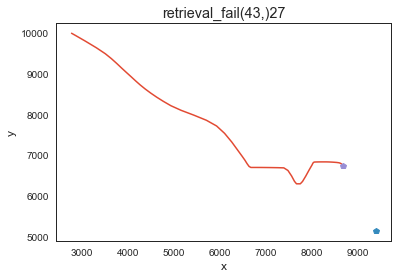

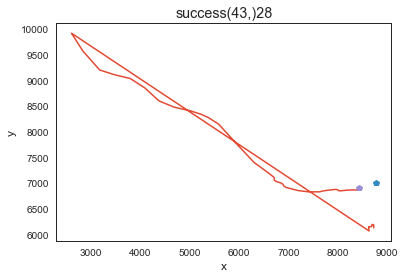

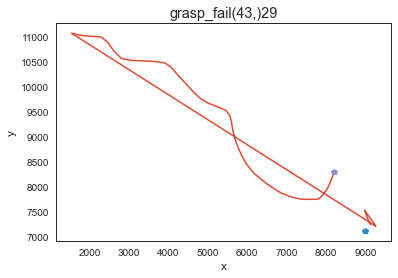

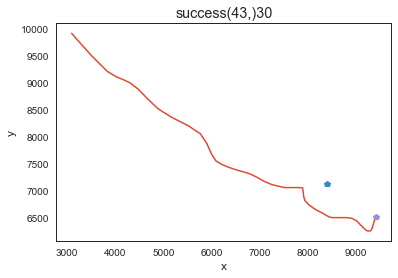

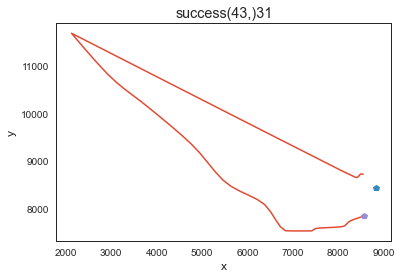

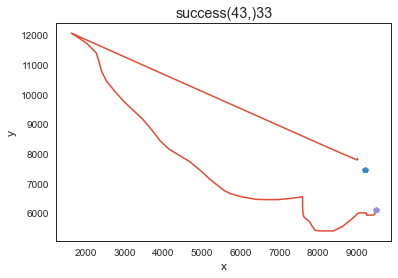

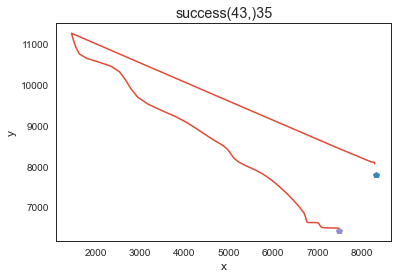

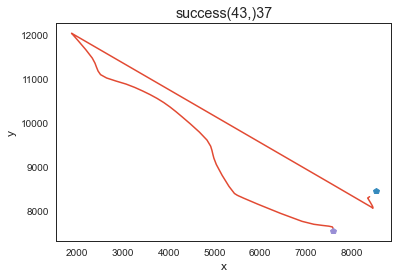

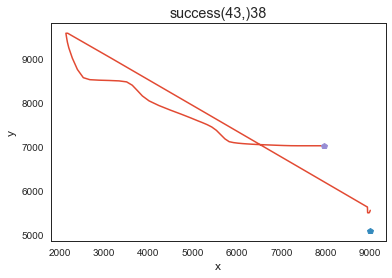

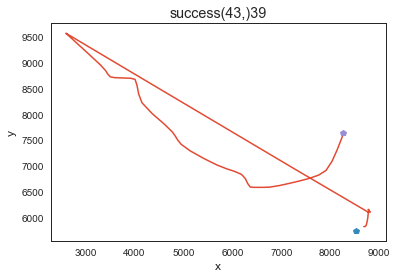

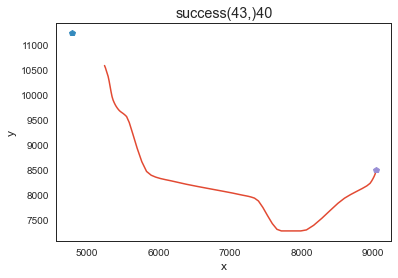

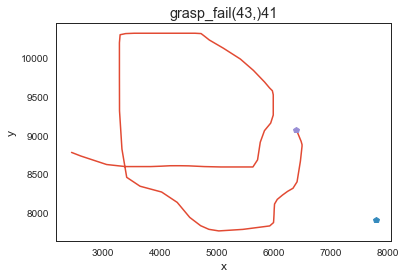

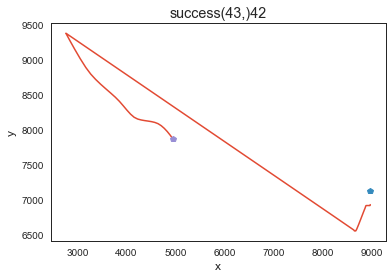

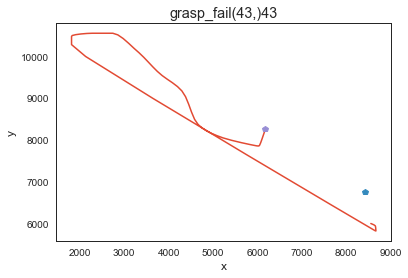

In [265]:
x=df.IntHandX
y=df.IntHandY
for i in reachs:
    plt.figure()
    y_corrected = y[i]
    plt.plot(x[i][30:],y_corrected[30:])
    plt.plot(x[i][0],y_corrected[0],'p')
    plt.plot(x[i][-1],y_corrected[-1],'p')
    behav = df.behaviors[i]
    ind = i
    plt.title(str(behav) + str(_) + str(ind))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.close()

In [248]:
bad = [11,12,16,21,36,68]
for i in bad:
    reachs.remove(i)
print(reachs)

ValueError: list.remove(x): x not in list

In [ ]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

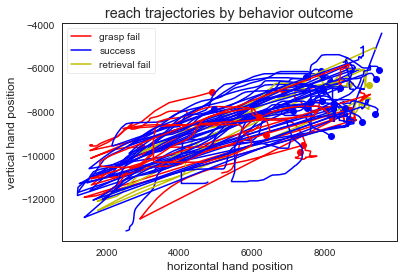

In [271]:
x=df.IntHandX
y=df.IntHandY
plt.figure()
for i in reachs:
    y_corrected = np.array(y[i])*-1
    if df.behaviors[i] == 'success':
        plt.plot(x[i],y_corrected,'b',label='success')
        plt.plot(x[i][-1],y_corrected[-1],'ro',color='b')
    if df.behaviors[i] == 'retrieval_fail':
        plt.plot(x[i],y_corrected,'y', label='retrieval fail')
        plt.plot(x[i][-1],y_corrected[-1],'ro',color='y')
    if df.behaviors[i] == 'grasp_fail':
        plt.plot(x[i],y_corrected,'r',label='grasp fail')
        plt.plot(x[i][-1],y_corrected[-1],'ro',color='r')
    behav = df.behaviors[i]
    ind = i
    plt.title('reach trajectories by behavior outcome')
    plt.legend('')
    plt.xlabel('horizontal hand position')
    plt.ylabel('vertical hand position')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    #not smoothed


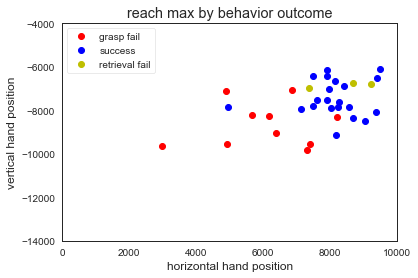

In [270]:
x=df.IntHandX
y=df.IntHandY
plt.figure()
for i in reachs:
    y_corrected = np.array(y[i])*-1
    if df.behaviors[i] == 'success':
        plt.plot(x[i][-1],y_corrected[-1],'ro',color='b',label='success')
    if df.behaviors[i] == 'retrieval_fail':
        plt.plot(x[i][-1],y_corrected[-1],'ro',color='y',label='retrieval fail')
    if df.behaviors[i] == 'grasp_fail':
        plt.plot(x[i][-1],y_corrected[-1],'ro',color='r',label='grasp fail')
    behav = df.behaviors[i]
    ind = i
    xlim(0,10000)
    ylim(-14000,-4000)
    plt.title('reach max by behavior outcome')
    plt.legend('')
    plt.xlabel('horizontal hand position')
    plt.ylabel('vertical hand position')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    #not smoothed


In [ ]:
x=df.HandX
y=df.HandY
plt.figure()
for i in reachs:
    y_corrected = np.array(y[i])*-1
    if df.behaviors[i] == 'success':
        plt.plot(x[i],y_corrected,'b',label='success')
        plt.plot(x[i][0],y_corrected[0],'p')
    if df.behaviors[i] == 'retrieval_fail':
        plt.plot(x[i],y_corrected,'y', label='retrieval fail')
        plt.plot(x[i][0],y_corrected[0],'p')
    if df.behaviors[i] == 'grasp_fail':
        plt.plot(x[i],y_corrected,'r',label='grasp fail')
        plt.plot(x[i][0],y_corrected[0],'p')
    behav = df.behaviors[i]
    ind = i
    plt.title('reach trajectories by behavior outcome')
    plt.legend('')
    plt.xlabel('horizontal hand position')
    plt.ylabel('vertical hand position')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    #not smoothed

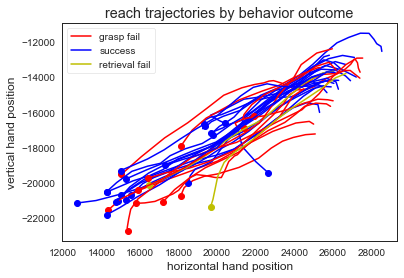

In [216]:
x=df.HandX
y=df.HandY
plt.figure()
sigma = 0.7

for i in reachs:
    y_corrected = gaussian_filter1d((np.array(y[i])*-1), sigma=sigma)
    x_smooth = gaussian_filter1d(x[i], sigma=sigma)
    if df.behaviors[i] == 'success':
        plt.plot(x_smooth,y_corrected,'b',label='success')
        plt.plot(x_smooth[0],y_corrected[0],'ro',color='b')
    if df.behaviors[i] == 'retrieval_fail':
        plt.plot(x_smooth,y_corrected,'y', label='retrieval fail')
        plt.plot(x_smooth[0],y_corrected[0],'ro',color='y')
    if df.behaviors[i] == 'grasp_fail':
        plt.plot(x_smooth,y_corrected,'r',label='grasp fail')
        plt.plot(x_smooth[0],y_corrected[0],'ro',color='r')
    behav = df.behaviors[i]
    ind = i
    plt.title('reach trajectories by behavior outcome')
    plt.legend('')
    plt.xlabel('horizontal hand position')
    plt.ylabel('vertical hand position')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    #not smoothed


In [51]:
from scipy import stats
import numpy as np

In [55]:
z = np.abs(stats.zscore(xs[0]))
print(z)
print(np.where(z > 3))

[0.14848691 0.11844375 0.12269514 0.15245488 0.15273831 0.03454964
 0.15840683 3.11544764 0.171161   3.13863189 0.05246216 0.00966483
 0.15477897 0.16639944 0.36734852 0.23725596 0.08193848 0.02207889
 0.15166129 0.11731005]
(array([7, 9]),)


In [ ]:
#figure out which to ignore
np.diff
create missing data
choose method to interpolate missing data - linear interpolation between edges

In [201]:
dots = sns.load_dataset("dots")